Linear Regression algorithm from scratch on single feature and our equation will be of type 

        y=a0 + a1*x            here X is row vector of features of size 100*1 
                               y is row vector of output of size of 100*1
                               
                               
       1. we have to guess m and b
       2. calculate cost function which we have to minimise 
               we will use least square method 
       3. we will optimise cost function using gradient descent
       

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = np.genfromtxt("data.csv",delimiter=",")

In [144]:
y=data[:,1]  #actual values of y of size 100*1


In [143]:
X=data[:,0] #input features of size 100*1

We will make a function for linear regression

Plotting the values of x and y on a graph 

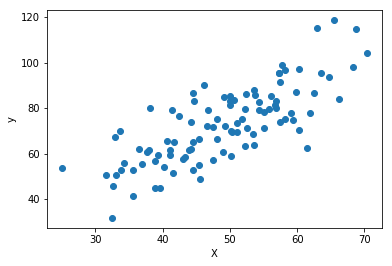

In [41]:
plt.plot(X,y,'o')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Gradient descent funtion
formula for 
    gradient descent = sum(h-y)/num_of_training_examples



In [169]:
def gradient_descent(learning_rate,current_a0,current_a1,y,X):
    gradient_a0=0
    gradient_a1=0
    m = float(len(y))
    for i in range(len(y)):
        gradient_a0 = gradient_a0 + ((current_a0 + X[i]*current_a1)-y[i])
        gradient_a1 = gradient_a1 + ((current_a0 + X[i]*current_a1)-y[i])*X[i]
    
    #Now we update the values of the a0 and  a1
    
    new_a0 = current_a0 - (learning_rate*gradient_a0)/m
    new_a1 = current_a1 - (learning_rate*gradient_a1)/m
    
    return [new_a0,new_a1]

In [170]:
def costFunction(a0,a1,X,y):
    J=0
    m = len(y) #no of training examples
    for i in range(m):
        error = ((a0 + a1*X[i])-y[i])**2   #our cost function or error in our hypothesis
        J = J + error
    J = J/float((2*m))
    return J

In [174]:

learning_rate = 0.0001  #learning rate for the finding the optimal values of a0 and a1
num_epochs = 1000  #number of iterations 


def linearRegression(X,y,a0,a1):
    for i in range(num_epochs):
        a0,a1 = gradient_descent(learning_rate,a0,a1,y,X)
        error = costFunction(a0,a1,X,y)
    return a0,a1,error

In [178]:
a0=0
a1=0
print("initial values before running regression a0={0},a1={1},error={2}".format(a0,a1,costFunction(a0,a1,X,y)))
print("Tuning the parameter....")
a0,a1,error = linearRegression(X,y,a0,a1)
print("a0={0},a1={1},error={2}".format(a0,a1,error))

initial values before running regression a0=0,a1=0,error=2782.5539172416056
Tuning the parameter....
a0=0.05905855664216082,a1=1.4783313274545458,error=56.316335393554716


initial values before running regression a0=0,a1=0,error=2782.5539172416056
Tuning the parameter....
a0=0.05905855664216082,a1=1.4783313274545458,error=56.316335393554716

# Now we will plot the graph with datapoints and the best fitted line using matplotlib

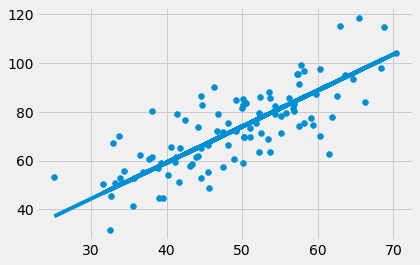

In [183]:
from matplotlib import style
style.use('fivethirtyeight')

regression_line = [a0+(a1*x) for x in X]

plt.scatter(X,y)
plt.plot(X,regression_line)
plt.show()